<a href="https://colab.research.google.com/github/Shreeranga1/TimeSeries/blob/main/timeSeriesSession4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/Shreeranga1/TimeSeries/main/TractorSales.csv')
df.head()

,Month-Year,Number of Tractor Sold
0,3-Jan,141
1,3-Feb,157
2,3-Mar,185
3,3-Apr,199
4,3-May,203


In [4]:
dates=pd.date_range(start='3/1/2003',freq='MS',periods=len(df))

In [8]:
df['dateRange']=dates

In [9]:
df.set_index(df['dateRange'],inplace=True)

In [10]:
df.drop(columns=['Month-Year','dateRange'],inplace=True)

In [11]:
df.head()

,Number of Tractor Sold
dateRange,
2003-03-01,141
2003-04-01,157
2003-05-01,185
2003-06-01,199
2003-07-01,203


In [18]:
df.rename({df.columns[0]:'NumberofTractorSold'},inplace=True)

In [20]:
df['NumberofTractorSold']=df['Number of Tractor Sold']

In [21]:
df.head()

,Number of Tractor Sold,NumberofTractorSold
dateRange,,
2003-03-01,141,141
2003-04-01,157,157
2003-05-01,185,185
2003-06-01,199,199
2003-07-01,203,203


In [23]:
df.drop(columns=df.columns[0],inplace=True)

In [24]:
df.head()

,NumberofTractorSold
dateRange,
2003-03-01,141
2003-04-01,157
2003-05-01,185
2003-06-01,199
2003-07-01,203


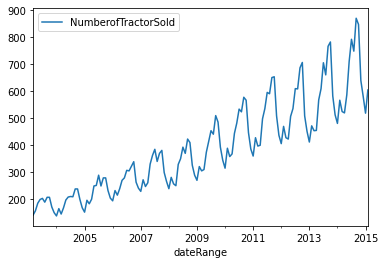

In [25]:
df.plot()

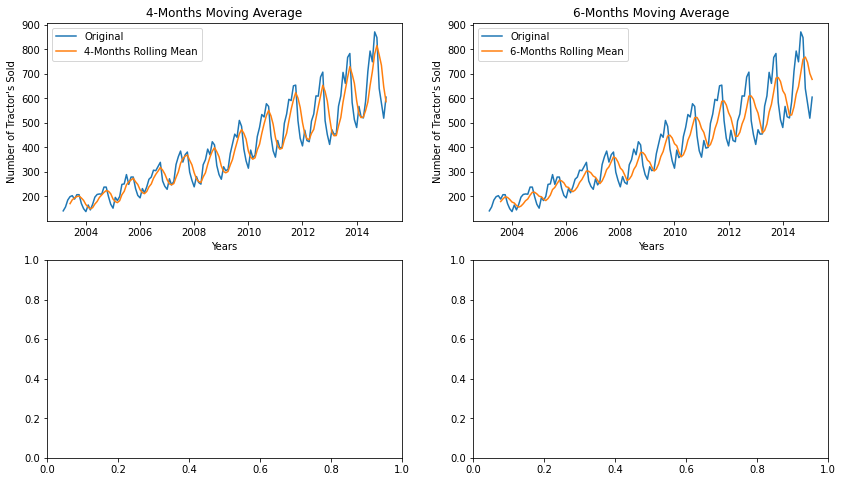

In [31]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(df.index, df, label='Original')
axes[0][0].plot(df.index, df.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

sales_ts=df


axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

Write a code to determine the rolling statistics(i.e - Original,Rolling mean,Rolling Standard deviation) and plot a graph accordingly.

In [33]:
rolmean=df.rolling(window=4).mean()
rolstd = sales_ts.rolling(window = 4).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

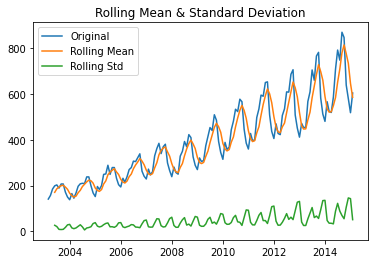

In [34]:
#Plot rolling statistics:
orig = plt.plot(sales_ts, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

# Stationary Check

In [35]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [38]:
dftest = adfuller(sales_ts.NumberofTractorSold)
dftest[1]<0.05

False

Time series decompose

In [39]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(sales_ts, model='multiplicative')

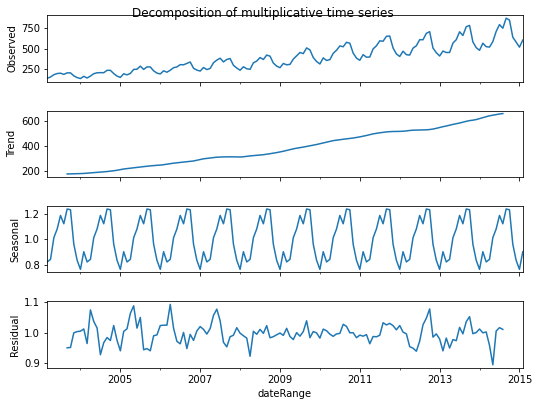

In [40]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

so take differencing 

Text(0, 0.5, 'Tractor Sales')

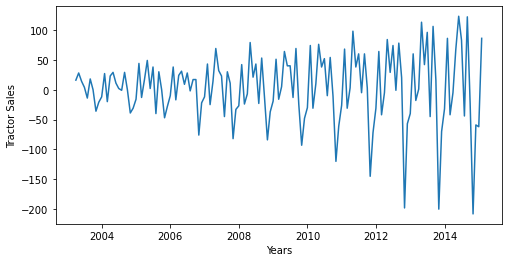

In [41]:
plt.figure(figsize=(8, 4))
plt.plot(sales_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

## variane is stil not going 

Text(0, 0.5, 'Log (Tractor Sales)')

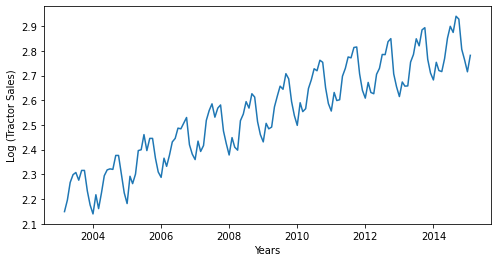

In [42]:
plt.figure(figsize=(8, 4))
plt.plot(np.log10(sales_ts))
plt.xlabel('Years')
plt.ylabel('Log (Tractor Sales)')

Text(0, 0.5, 'Differenced Log (Tractor Sales)')

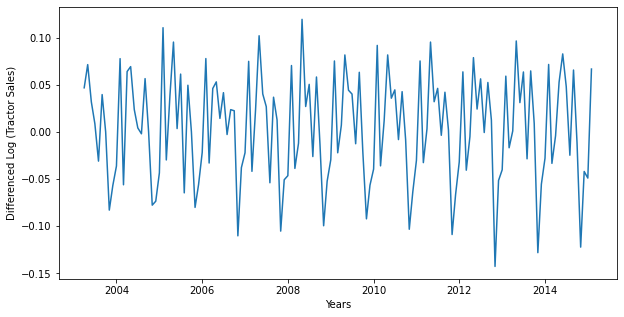

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(sales_ts).diff(periods=1))
plt.xlabel('Years')
plt.ylabel('Differenced Log (Tractor Sales)')

In [44]:
sales_ts_log = np.log10(sales_ts)
sales_ts_log.dropna(inplace=True)

sales_ts_log_diff = sales_ts_log.diff(periods=1) # same as ts_log_diff = ts_log - ts_log.shift(periods=1)
sales_ts_log_diff.dropna(inplace=True)

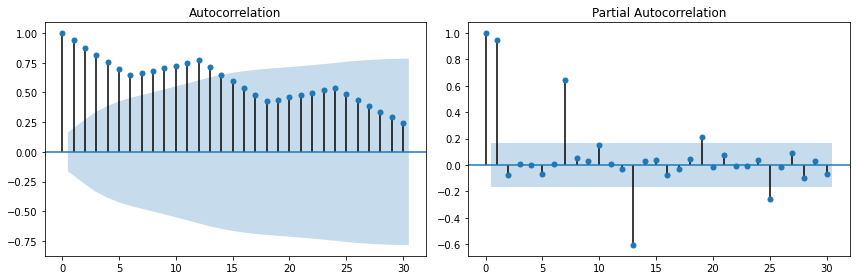

In [46]:
import statsmodels.tsa.api as smt
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log, lags=30, ax=axes[1])
plt.tight_layout()

Still seeing stationarity inacf plot

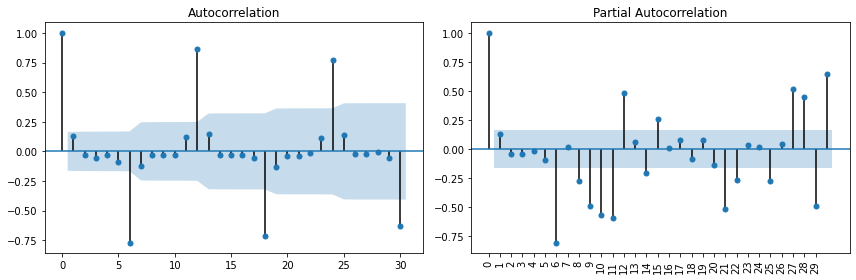

In [47]:
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
plt.xticks(range(0,30,1), rotation = 90)
smt.graphics.plot_acf(sales_ts_log_diff, lags=30, ax=axes[0])
smt.graphics.plot_pacf(sales_ts_log_diff, lags=30, ax=axes[1])
plt.tight_layout()

In [49]:
import itertools
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [54]:
#Separate data into train and test
data=df
data['date'] = data.index
train = data[data.index < '2013-01-01']
test = data[data.index >= '2013-01-01']
train_sales_ts_log = np.log10(train.NumberofTractorSold)

In [55]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

In [56]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True)
            results = temp_model.fit()

            
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:993: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, Va

Best SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 model - AIC:-587.8561620840549


Predict sales on in-sample date using the best fit ARIMA model

In [57]:
best_model = sm.tsa.statespace.SARIMAX(train_sales_ts_log,
                                      order=(0, 1, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=True)
best_results = best_model.fit()



print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()
pred99 = best_results.get_forecast(steps=24, alpha=0.1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                NumberofTractorSold   No. Observations:                  118
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 297.928
Date:                            Fri, 15 Oct 2021   AIC                           -587.856
Time:                                    19:52:23   BIC                           -576.807
Sample:                                03-01-2003   HQIC                          -583.371
                                     - 12-01-2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2980      0.080     -3.726      0.000      -0.455      -0.141
ar.S.L12       0.9884      0.009   

In [58]:
# Extract the predicted and true values of our time series
sales_ts_forecasted = pred_dynamic.predicted_mean
testCopy = test.copy()
testCopy['sales_ts_forecasted'] = np.power(10, pred99.predicted_mean)

In [60]:
mse = ((testCopy.NumberofTractorSold - testCopy['sales_ts_forecasted']) ** 2).mean()
rmse = np.sqrt(mse)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 3)))

The Root Mean Squared Error of our forecasts is 42.631


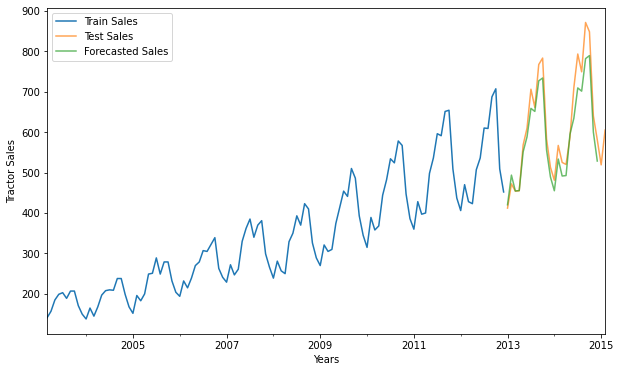

In [63]:
axis = train.NumberofTractorSold.plot(label='Train Sales', figsize=(10, 6))
testCopy.NumberofTractorSold.plot(ax=axis, label='Test Sales', alpha=0.7)
testCopy['sales_ts_forecasted'].plot(ax=axis, label='Forecasted Sales', alpha=0.7)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()
plt.close()